In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns

In [124]:
## 한글설정
path = 'C:/Users/jaemi/AppData/Local/Microsoft/Windows/Fonts/NanumGothicCoding.ttf'

font_name = fm.FontProperties(fname= path).get_name()
rc('font', family = font_name)

## 마이너스
mpl.rcParams['axes.unicode_minus']= False

In [125]:
## 여자의 나이에 따른 출산 나이
df_fe = pd.read_csv('./시도모의 연령(5세계급)모의 교육정도별 출생(2008_2021).csv', encoding='cp949')
## 남자의 나이에 따른 출산 나이
df_ma = pd.read_csv('./시도부의 연령(5세계급)부의 교육정도별 출생(2008_2021).csv', encoding='cp949')
## 전국_연령별_장애유형별_성별_등록장애인수
df_dis = pd.read_csv('./117_DT_11761_N003_20230517113950.csv', encoding='cp949')
# 전국 나이별 인구수
df_all = pd.read_csv('./행정구역(시군구)별1세별 주민등록인구(2008_2021).csv', encoding='cp949')


In [126]:
# 전체 여자의 계 계산
total_female = df_fe.iloc[0, 5:19]
# 20대 여자의 데이터 추출
data_20_female = df_fe.iloc[30, 5:19] + df_fe.iloc[40, 5:19]
# 30대 여자의 데이터 추출
data_30_female = df_fe.iloc[50, 5:19] + df_fe.iloc[60, 5:19]
# 40대 여자의 데이터 추출
data_40_female = df_fe.iloc[70, 5:19] + df_fe.iloc[80, 5:19]

# 20대 여자의 비율 계산
ratio_20_female = data_20_female / total_female * 100
# 30대 여자의 비율 계산
ratio_30_female = data_30_female / total_female * 100
# 40대 여자의 비율 계산
ratio_40_female = data_40_female / total_female * 100

# 20~40대 연결
ratio_20_40_female = pd.concat([ratio_20_female, ratio_30_female, ratio_40_female], axis=1)

ratio_20_40_female.columns = ['20대 여자', '30대 여자', '40대 여자']

ratio_20_40_female

,20대 여자,30대 여자,40대 여자
2008 년,42.298644,55.451478,1.474805
2009 년,40.646826,56.829621,1.715863
2010 년,36.526072,60.712166,1.962903
2011 년,34.302569,62.741557,2.242687
2012 년,31.330306,65.670209,2.371272
2013 년,28.605927,68.169456,2.519847
2014 년,26.953047,69.670789,2.717053
2015 년,26.261576,70.328224,2.844989
2016 년,25.628503,70.716542,3.127931
2017 년,25.098177,70.908486,3.514818


In [127]:
# 전체 남자의 계 계산
total_male = df_ma.iloc[0, 5:19]
# 20대 남자의 데이터 추출
data_20_male = df_ma.iloc[30, 5:19] + df_ma.iloc[40, 5:19]
# 30대 남자의 데이터 추출
data_30_male = df_ma.iloc[50, 5:19] + df_ma.iloc[60, 5:19]
# 40대 남자의 데이터 추출
data_40_male = df_ma.iloc[70, 5:19] + df_ma.iloc[80, 5:19]

# 20대 남자의 비율 계산
ratio_20_male = data_20_male / total_male * 100
# 30대 남자의 비율 계산
ratio_30_male = data_30_male / total_male * 100
# 40대 남자의 비율 계산
ratio_40_male = data_40_male / total_male * 100

# 20~40대 연결
ratio_20_40_male = pd.concat([ratio_20_male, ratio_30_male, ratio_40_male], axis=1)

ratio_20_40_male.columns = ['20대 남자', '30대 남자', '40대 남자']

ratio_20_40_male

,20대 남자,30대 남자,40대 남자
2008 년,19.401492,72.387163,6.94925
2009 년,18.728602,72.274187,7.691149
2010 년,16.841958,73.02407,8.576667
2011 년,16.097949,72.960861,9.415509
2012 년,14.434836,73.964297,9.999794
2013 년,13.010505,74.570803,10.714965
2014 년,12.081482,75.039903,11.215681
2015 년,11.846859,74.923133,11.691529
2016 년,11.590354,74.590085,12.25055
2017 년,11.329314,73.874909,13.169597


In [128]:
## 년도별 장애인구 추출
df_dis_index1000 = df_dis.iloc[:1000, :]
df_dis_under20 = df_dis_index1000.iloc[48::288, 5:19].astype(int)
df_dis_under20 
df_dis_sum = df_dis_under20.sum()
df_dis_sum


2008 년    90764
2009 년    96404
2010 년    95938
2011 년    94392
2012 년    92810
2013 년    91769
2014 년    90522
2015 년    89646
2016 년    89486
2017 년    89786
2018 년    90068
2019 년    90768
2020 년    90175
2021 년    91988
dtype: int64

In [129]:
## 년도별 20대 미만 인구수
df_all_20 = df_all.iloc[:62, :]
df_all_20
df_all_under20 = df_all_20.iloc[3::3, 5:19]
df_all_under20_sum = df_all_under20.sum()
df_all_under20_sum


2008 년    11921785.0
2009 년    11734619.0
2010 년    11584399.0
2011 년    11356974.0
2012 년    11115990.0
2013 년    10853649.0
2014 년    10580278.0
2015 년    10318777.0
2016 년    10047206.0
2017 년     9739623.0
2018 년     9434215.0
2019 년     9125924.0
2020 년     8763406.0
2021 년     8469666.0
dtype: float64

In [130]:
## 장애 비율 계산
ratio_under_20 = df_dis_sum / df_all_under20_sum * 100
ratio_under_20

under_20_df = pd.DataFrame(ratio_under_20, columns=['장애인 비율'])
under_20_df

,장애인 비율
2008 년,0.761329
2009 년,0.821535
2010 년,0.828166
2011 년,0.831137
2012 년,0.834923
2013 년,0.845513
2014 년,0.855573
2015 년,0.868766
2016 년,0.890656
2017 년,0.921863


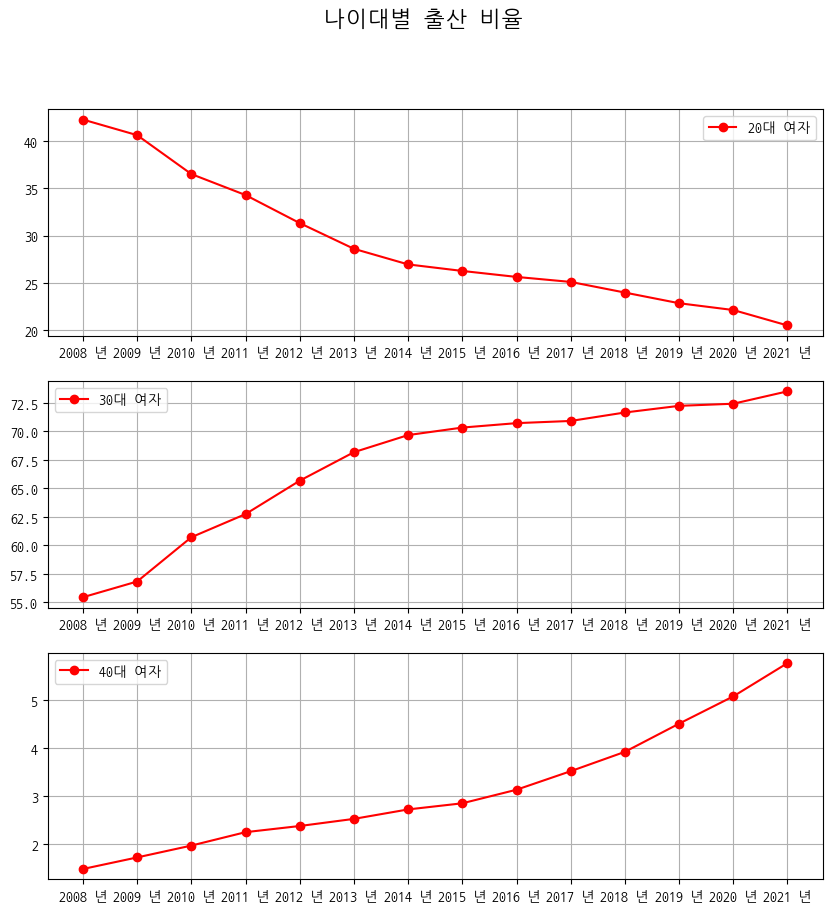

In [131]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

# 20대 여자 비율 그래프 그리기
ax[0].plot(ratio_20_female, 'ro-', label='20대 여자')

# 30대 여자 비율 그래프 그리기
ax[1].plot(ratio_30_female, 'ro-', label='30대 여자')

# 40대 여자 비율 그래프 그리기
ax[2].plot(ratio_40_female, 'ro-', label='40대 여자')

# 그래프 타이틀과 레이블 설정
fig.suptitle('나이대별 출산 비율', fontsize=16)
# ax[1].set_xlabel('년도')
# ax[0].set_ylabel('20대 여자')
# ax[1].set_ylabel('30대 여자')
# ax[2].set_ylabel('40대 여자')

ax[0].legend()
ax[1].legend()
ax[2].legend()

# 그래프 출력
ax[0].grid()
ax[1].grid()
ax[2].grid()

plt.show()

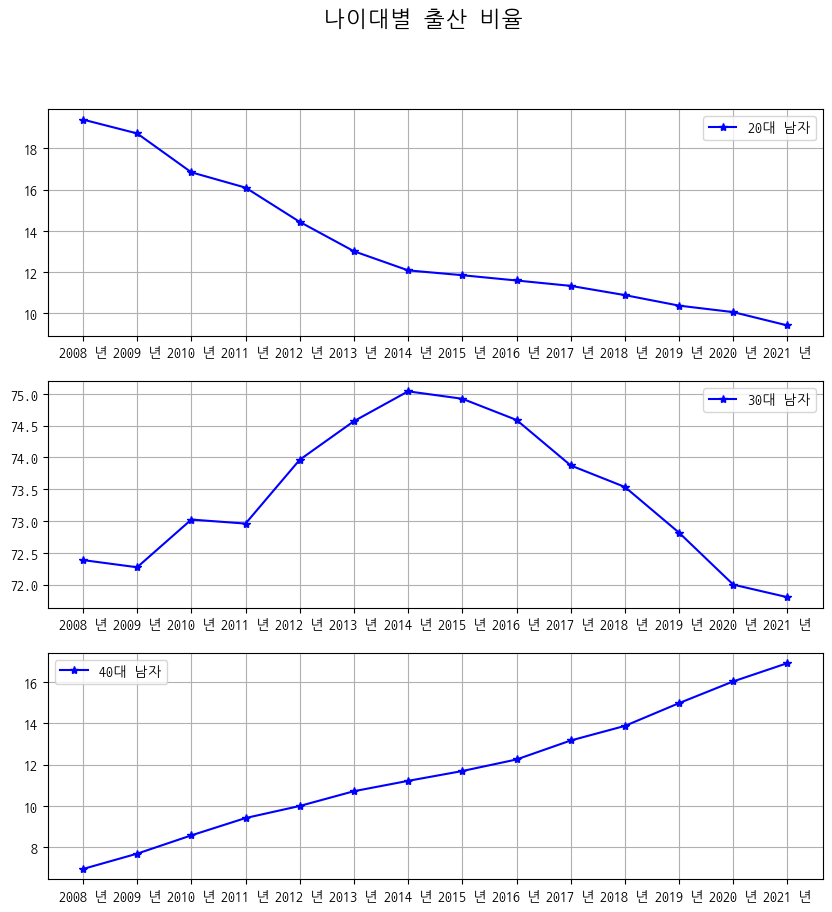

In [143]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

# 20대 남자 비율 그래프 그리기
ax[0].plot(ratio_20_male, 'b*-', label='20대 남자')

# 30대 남자 비율 그래프 그리기
ax[1].plot(ratio_30_male, 'b*-', label='30대 남자')

# 40대 남자 비율 그래프 그리기
ax[2].plot(ratio_40_male, 'b*-', label='40대 남자')

# 그래프 타이틀과 레이블 설정
fig.suptitle('나이대별 출산 비율', fontsize=16)
# ax[1].set_xlabel('년도')
# ax[0].set_ylabel('20대 남자')
# ax[1].set_ylabel('30대 남자')
# ax[2].set_ylabel('40대 남자')
ax[0].legend()
ax[1].legend()
ax[2].legend()

# 그래프 출력
ax[0].grid()
ax[1].grid()
ax[2].grid()

plt.show()

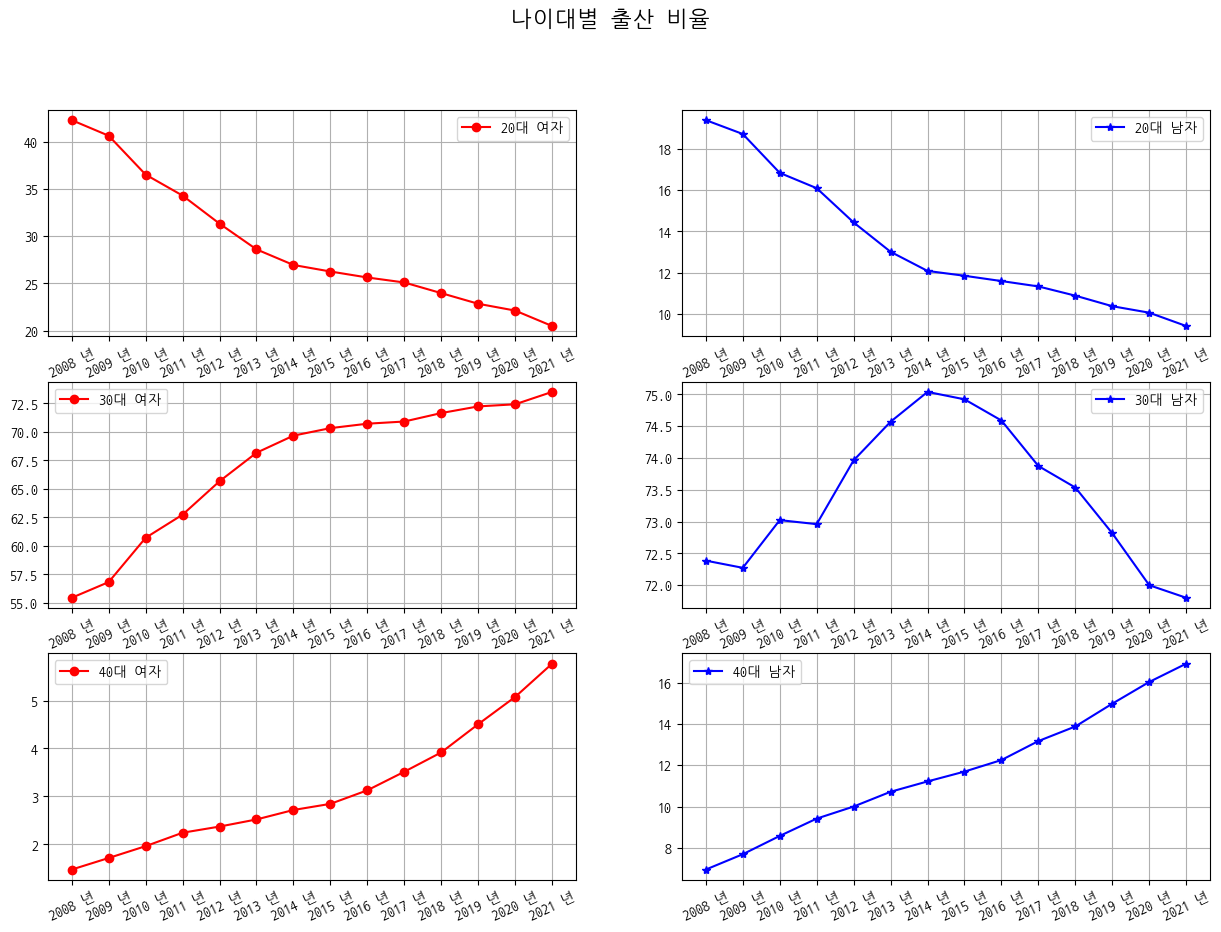

In [145]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))

# 20대 비율 그래프 그리기
ax[0, 0].plot(ratio_20_female, 'ro-', label='20대 여자')
ax[0, 1].plot(ratio_20_male, 'b*-', label='20대 남자')
# 30대 비율 그래프 그리기
ax[1, 0].plot(ratio_30_female, 'ro-', label='30대 여자')
ax[1, 1].plot(ratio_30_male, 'b*-', label='30대 남자')
# 40대 비율 그래프 그리기
ax[2, 0].plot(ratio_40_female, 'ro-', label='40대 여자')
ax[2, 1].plot(ratio_40_male, 'b*-', label='40대 남자')

# 그래프 타이틀과 레이블 설정
fig.suptitle('나이대별 출산 비율', fontsize=16)

# x 값을 회전시키기
ax[0, 0].set_xticks(under_20_df.index)
ax[0, 0].set_xticklabels(under_20_df.index, rotation=25)

# 나머지 서브플롯에도 동일하게 설정
ax[0, 1].set_xticks(under_20_df.index)
ax[0, 1].set_xticklabels(under_20_df.index, rotation=25)

ax[1, 0].set_xticks(under_20_df.index)
ax[1, 0].set_xticklabels(under_20_df.index, rotation=25)

ax[1, 1].set_xticks(under_20_df.index)
ax[1, 1].set_xticklabels(under_20_df.index, rotation=25)

ax[2, 0].set_xticks(under_20_df.index)
ax[2, 0].set_xticklabels(under_20_df.index, rotation=25)

ax[2, 1].set_xticks(under_20_df.index)
ax[2, 1].set_xticklabels(under_20_df.index, rotation=25)

# 그래프 출력
ax[0, 0].legend()
ax[1, 0].legend()
ax[2, 0].legend()
ax[0, 1].legend()
ax[1, 1].legend()
ax[2, 1].legend()

ax[0, 0].grid()
ax[1, 0].grid()
ax[2, 0].grid()
ax[0, 1].grid()
ax[1, 1].grid()
ax[2, 1].grid()

plt.show()

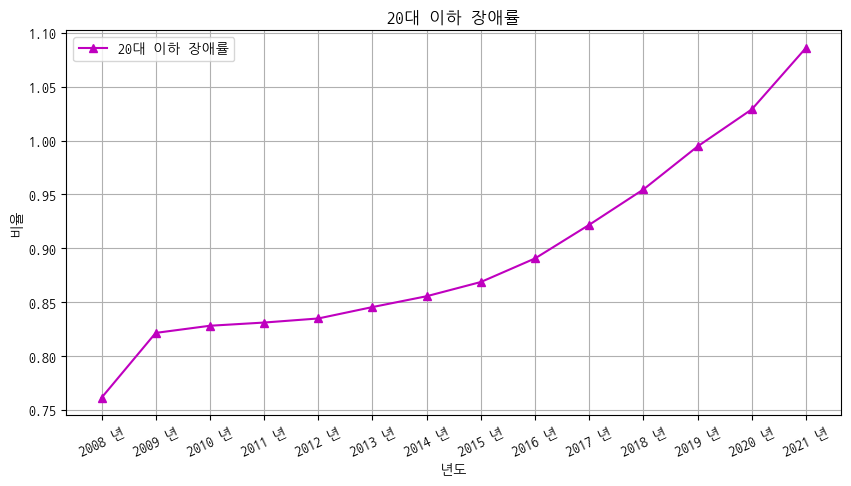

In [134]:
# 그래프 크기 설정
plt.figure(figsize=(10, 5))

# 쟁애 발생률 그래프 그리기
plt.plot(ratio_under_20, 'm^-', label='20대 이하 장애률')

# 그래프 타이틀과 레이블 설정
plt.title('20대 이하 장애률')
plt.xlabel('년도')
plt.ylabel('비율')

plt.xticks(rotation = 25)

plt.legend()

# 그래프 출력
plt.grid()
plt.show()

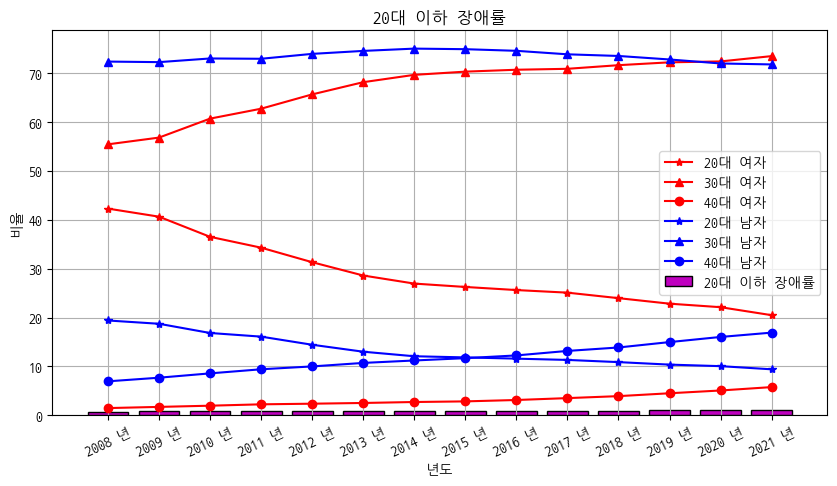

In [135]:
# 그래프 크기 설정
plt.figure(figsize=(10, 5))

# 40대 남자 비율 그래프 그리기
plt.plot(ratio_20_female, 'r*-', label='20대 여자')
plt.plot(ratio_30_female, 'r^-', label='30대 여자')
plt.plot(ratio_40_female, 'ro-', label='40대 여자')
plt.plot(ratio_20_male, 'b*-', label='20대 남자')
plt.plot(ratio_30_male, 'b^-', label='30대 남자')
plt.plot(ratio_40_male, 'bo-', label='40대 남자')

# 장애 발생률 그래프 그리기
plt.bar(ratio_under_20.index, ratio_under_20, color='m', edgecolor='black', label='20대 이하 장애률')

# 그래프 타이틀과 레이블 설정
plt.title('20대 이하 장애률')
plt.xlabel('년도')
plt.ylabel('비율')

plt.xticks(rotation = 25)

plt.legend()

# 그래프 출력
plt.grid()
plt.show()

In [146]:
# 상관관계 비교
cor = pd.concat([under_20_df, ratio_20_40_female, ratio_20_40_male], axis= 1).corr()
cor

,장애인 비율,20대 여자,30대 여자,40대 여자,20대 남자,30대 남자,40대 남자
장애인 비율,1.000000,-0.848865,0.797284,0.992982,-0.837848,-0.350526,0.969017
20대 여자,-0.848865,1.000000,-0.995717,-0.877555,0.999118,-0.182796,-0.947205
30대 여자,0.797284,-0.995717,1.000000,0.829581,-0.996569,0.271635,0.913932
40대 여자,0.992982,-0.877555,0.829581,1.000000,-0.867868,-0.303874,0.983267
20대 남자,-0.837848,0.999118,-0.996569,-0.867868,1.000000,-0.204634,-0.940860
30대 남자,-0.350526,-0.182796,0.271635,-0.303874,-0.204634,1.000000,-0.138202
40대 남자,0.969017,-0.947205,0.913932,0.983267,-0.940860,-0.138202,1.000000


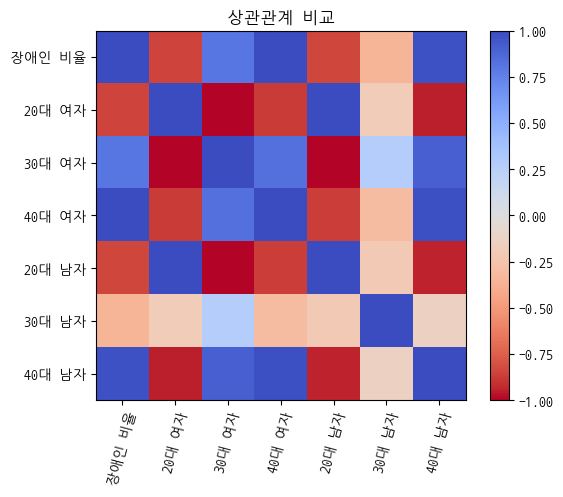

In [147]:
# 상관계수 그래프
plt.imshow(cor, cmap='coolwarm_r', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(cor)), cor.keys(), rotation = 75)
plt.yticks(range(len(cor)), cor.keys())

plt.title('상관관계 비교')

plt.show()